In [32]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot, autocorrelation_plot

Data preprocessing

In [33]:
exchange_data = pd.read_csv("C:/Users/peter/Documents/Data Science/Final Project/Data/Bitcoin_1_20_2015-3_19_2015_exchange_data_coinmarketcap.csv", sep=None, engine='python')
exchange_data.head()

,﻿timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2024-01-23T00:00:00.000Z,2024-01-23T23:59:59.999Z,2024-01-23T04:27:00.000Z,2024-01-23T14:24:00.000Z,2781,39518.715453,40127.353427,38521.893888,39845.551147,2.924455e+10,7.812340e+11,2024-01-23T23:59:59.999Z
1,2024-01-22T00:00:00.000Z,2024-01-22T23:59:59.999Z,2024-01-22T01:05:00.000Z,2024-01-22T19:44:00.000Z,2781,41553.652691,41651.206793,39450.118993,39507.368824,3.133871e+10,7.745654e+11,2024-01-22T23:59:59.999Z
2,2024-01-21T00:00:00.000Z,2024-01-21T23:59:59.999Z,2024-01-21T14:17:00.000Z,2024-01-21T23:32:00.000Z,2781,41671.488525,41855.368721,41497.009664,41545.783514,9.344044e+09,8.144890e+11,2024-01-21T23:59:59.999Z
3,2024-01-20T00:00:00.000Z,2024-01-20T23:59:59.999Z,2024-01-20T21:10:00.000Z,2024-01-20T00:39:00.000Z,2781,41624.589029,41877.893918,41446.823090,41665.584836,1.158669e+10,8.168012e+11,2024-01-20T23:59:59.999Z
4,2024-01-19T00:00:00.000Z,2024-01-19T23:59:59.999Z,2024-01-19T20:15:00.000Z,2024-01-19T17:11:00.000Z,2781,41278.459185,42134.158975,40297.457858,41618.407365,2.575241e+10,8.158396e+11,2024-01-19T23:59:59.999Z


In [34]:
exchange_data.columns

Index(['﻿timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
       'low', 'close', 'volume', 'marketCap', 'timestamp'],
      dtype='object')

In [35]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ﻿timeOpen  3290 non-null   object 
 1   timeClose  3290 non-null   object 
 2   timeHigh   3290 non-null   object 
 3   timeLow    3290 non-null   object 
 4   name       3290 non-null   int64  
 5   open       3290 non-null   float64
 6   high       3290 non-null   float64
 7   low        3290 non-null   float64
 8   close      3290 non-null   float64
 9   volume     3290 non-null   float64
 10  marketCap  3290 non-null   float64
 11  timestamp  3290 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 308.6+ KB


In [36]:
exchange_data.reset_index(drop=True, inplace=True)

In [37]:
exchange_data.head()

,﻿timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2024-01-23T00:00:00.000Z,2024-01-23T23:59:59.999Z,2024-01-23T04:27:00.000Z,2024-01-23T14:24:00.000Z,2781,39518.715453,40127.353427,38521.893888,39845.551147,2.924455e+10,7.812340e+11,2024-01-23T23:59:59.999Z
1,2024-01-22T00:00:00.000Z,2024-01-22T23:59:59.999Z,2024-01-22T01:05:00.000Z,2024-01-22T19:44:00.000Z,2781,41553.652691,41651.206793,39450.118993,39507.368824,3.133871e+10,7.745654e+11,2024-01-22T23:59:59.999Z
2,2024-01-21T00:00:00.000Z,2024-01-21T23:59:59.999Z,2024-01-21T14:17:00.000Z,2024-01-21T23:32:00.000Z,2781,41671.488525,41855.368721,41497.009664,41545.783514,9.344044e+09,8.144890e+11,2024-01-21T23:59:59.999Z
3,2024-01-20T00:00:00.000Z,2024-01-20T23:59:59.999Z,2024-01-20T21:10:00.000Z,2024-01-20T00:39:00.000Z,2781,41624.589029,41877.893918,41446.823090,41665.584836,1.158669e+10,8.168012e+11,2024-01-20T23:59:59.999Z
4,2024-01-19T00:00:00.000Z,2024-01-19T23:59:59.999Z,2024-01-19T20:15:00.000Z,2024-01-19T17:11:00.000Z,2781,41278.459185,42134.158975,40297.457858,41618.407365,2.575241e+10,8.158396e+11,2024-01-19T23:59:59.999Z


In [38]:
for col in exchange_data.columns:
    print(repr(col))

'\ufefftimeOpen'
'timeClose'
'timeHigh'
'timeLow'
'name'
'open'
'high'
'low'
'close'
'volume'
'marketCap'
'timestamp'


In [39]:
exchange_data.columns = exchange_data.columns.str.replace('\ufeff', '')

In [40]:
exchange_data['timeOpen'] = pd.to_datetime(exchange_data['timeOpen'])
exchange_data['timeClose'] = pd.to_datetime(exchange_data['timeClose'])
exchange_data['timeHigh'] = pd.to_datetime(exchange_data['timeHigh'])
exchange_data['timeLow'] = pd.to_datetime(exchange_data['timeLow'])
exchange_data['timestamp'] = pd.to_datetime(exchange_data['timestamp'])


In [41]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeOpen   3290 non-null   datetime64[ns, UTC]
 1   timeClose  3290 non-null   datetime64[ns, UTC]
 2   timeHigh   3290 non-null   datetime64[ns, UTC]
 3   timeLow    3290 non-null   datetime64[ns, UTC]
 4   name       3290 non-null   int64              
 5   open       3290 non-null   float64            
 6   high       3290 non-null   float64            
 7   low        3290 non-null   float64            
 8   close      3290 non-null   float64            
 9   volume     3290 non-null   float64            
 10  marketCap  3290 non-null   float64            
 11  timestamp  3290 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](5), float64(6), int64(1)
memory usage: 308.6 KB


In [42]:
exchange_data.isnull().sum()

timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
name         0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64

In [43]:
exchange_data['timestamp'] = exchange_data['timestamp'].dt.date
exchange_data.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2024-01-23 00:00:00+00:00,2024-01-23 23:59:59.999000+00:00,2024-01-23 04:27:00+00:00,2024-01-23 14:24:00+00:00,2781,39518.715453,40127.353427,38521.893888,39845.551147,2.924455e+10,7.812340e+11,2024-01-23
1,2024-01-22 00:00:00+00:00,2024-01-22 23:59:59.999000+00:00,2024-01-22 01:05:00+00:00,2024-01-22 19:44:00+00:00,2781,41553.652691,41651.206793,39450.118993,39507.368824,3.133871e+10,7.745654e+11,2024-01-22
2,2024-01-21 00:00:00+00:00,2024-01-21 23:59:59.999000+00:00,2024-01-21 14:17:00+00:00,2024-01-21 23:32:00+00:00,2781,41671.488525,41855.368721,41497.009664,41545.783514,9.344044e+09,8.144890e+11,2024-01-21
3,2024-01-20 00:00:00+00:00,2024-01-20 23:59:59.999000+00:00,2024-01-20 21:10:00+00:00,2024-01-20 00:39:00+00:00,2781,41624.589029,41877.893918,41446.823090,41665.584836,1.158669e+10,8.168012e+11,2024-01-20
4,2024-01-19 00:00:00+00:00,2024-01-19 23:59:59.999000+00:00,2024-01-19 20:15:00+00:00,2024-01-19 17:11:00+00:00,2781,41278.459185,42134.158975,40297.457858,41618.407365,2.575241e+10,8.158396e+11,2024-01-19


In [44]:
exchange_data.set_index('timestamp', inplace=True)

In [45]:
exchange_data.reset_index(inplace = True)
exchange_data.head()
exchange_data['timestamp'] = pd.to_datetime(exchange_data['timestamp'])

In [46]:
exchange_data.head()

,timestamp,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap
0,2024-01-23,2024-01-23 00:00:00+00:00,2024-01-23 23:59:59.999000+00:00,2024-01-23 04:27:00+00:00,2024-01-23 14:24:00+00:00,2781,39518.715453,40127.353427,38521.893888,39845.551147,2.924455e+10,7.812340e+11
1,2024-01-22,2024-01-22 00:00:00+00:00,2024-01-22 23:59:59.999000+00:00,2024-01-22 01:05:00+00:00,2024-01-22 19:44:00+00:00,2781,41553.652691,41651.206793,39450.118993,39507.368824,3.133871e+10,7.745654e+11
2,2024-01-21,2024-01-21 00:00:00+00:00,2024-01-21 23:59:59.999000+00:00,2024-01-21 14:17:00+00:00,2024-01-21 23:32:00+00:00,2781,41671.488525,41855.368721,41497.009664,41545.783514,9.344044e+09,8.144890e+11
3,2024-01-20,2024-01-20 00:00:00+00:00,2024-01-20 23:59:59.999000+00:00,2024-01-20 21:10:00+00:00,2024-01-20 00:39:00+00:00,2781,41624.589029,41877.893918,41446.823090,41665.584836,1.158669e+10,8.168012e+11
4,2024-01-19,2024-01-19 00:00:00+00:00,2024-01-19 23:59:59.999000+00:00,2024-01-19 20:15:00+00:00,2024-01-19 17:11:00+00:00,2781,41278.459185,42134.158975,40297.457858,41618.407365,2.575241e+10,8.158396e+11


In [47]:
exchange_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  3290 non-null   datetime64[ns]     
 1   timeOpen   3290 non-null   datetime64[ns, UTC]
 2   timeClose  3290 non-null   datetime64[ns, UTC]
 3   timeHigh   3290 non-null   datetime64[ns, UTC]
 4   timeLow    3290 non-null   datetime64[ns, UTC]
 5   name       3290 non-null   int64              
 6   open       3290 non-null   float64            
 7   high       3290 non-null   float64            
 8   low        3290 non-null   float64            
 9   close      3290 non-null   float64            
 10  volume     3290 non-null   float64            
 11  marketCap  3290 non-null   float64            
dtypes: datetime64[ns, UTC](4), datetime64[ns](1), float64(6), int64(1)
memory usage: 308.6 KB


In [48]:
exchange_data.describe()

,timestamp,name,open,high,low,close,volume,marketCap
count,3290,3290.0,3290.000000,3290.000000,3290.000000,3290.000000,3.290000e+03,3.290000e+03
mean,2019-07-23 12:00:00,2781.0,15318.339148,15675.687939,14932.608926,15329.030191,1.726248e+10,2.870262e+11
min,2015-01-21 00:00:00,2781.0,210.067993,221.807007,199.567001,210.494995,1.060090e+07,2.996946e+09
25%,2017-04-22 06:00:00,2781.0,1257.215027,1275.662537,1242.304993,1265.897491,4.807630e+08,2.054960e+10
50%,2019-07-23 12:00:00,2781.0,8787.324941,8953.956079,8567.272189,8789.077228,1.312572e+10,1.556333e+11
75%,2021-10-22 18:00:00,2781.0,26079.169437,26419.632760,25753.052872,26094.576781,2.767727e+10,5.068956e+11
max,2024-01-23 00:00:00,2781.0,67549.735581,68789.625939,66382.061008,67566.830088,3.509679e+11,1.274831e+12
std,NaN,0.0,16363.041831,16754.505296,15922.441659,16363.555328,1.914526e+10,3.121530e+11


Data analysis

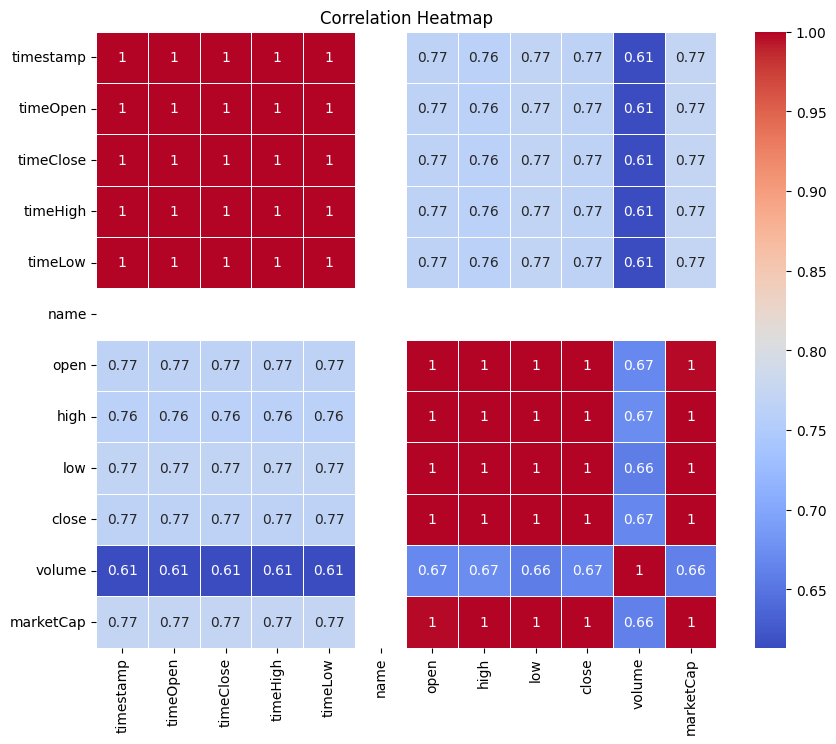

In [49]:
# Correlation heatmap
correlation_matrix = exchange_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

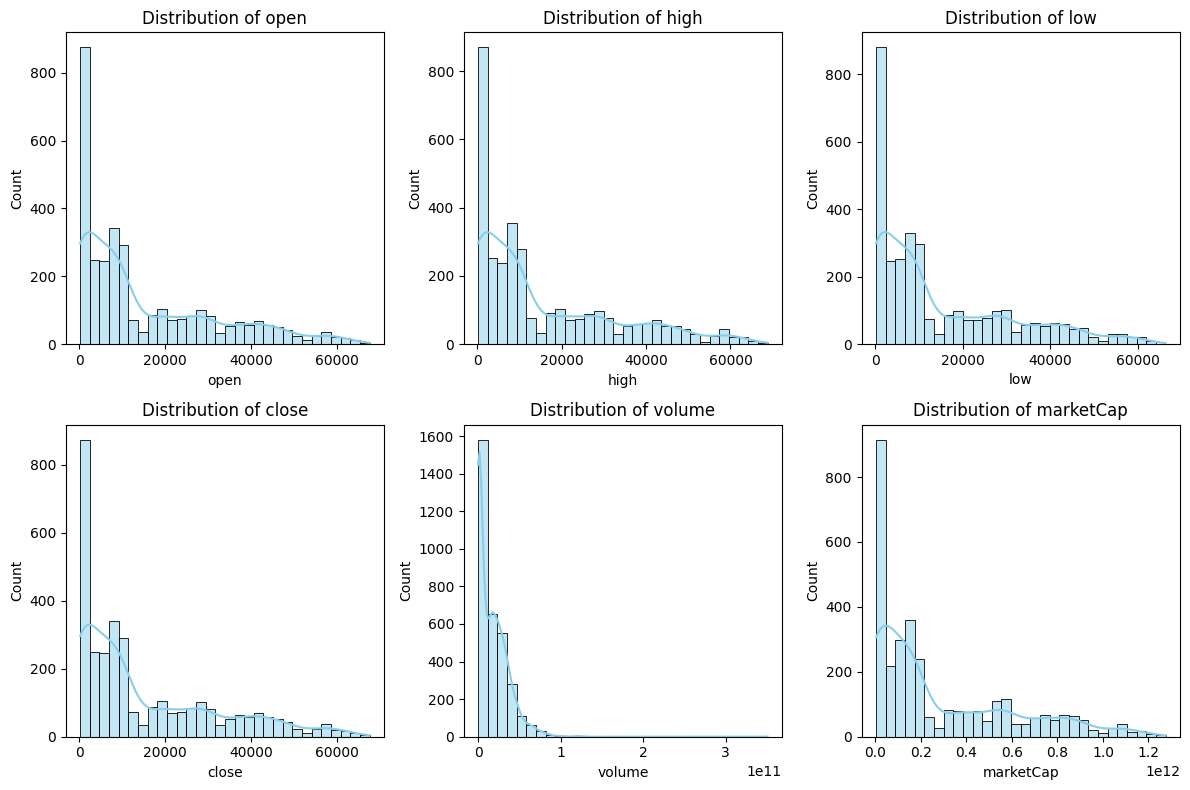

In [50]:
# Distributions

selected_columns = ['open', 'high', 'low', 'close', 'volume', 'marketCap']

# Plotting histograms for each selected variable
plt.figure(figsize=(12, 8))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(exchange_data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


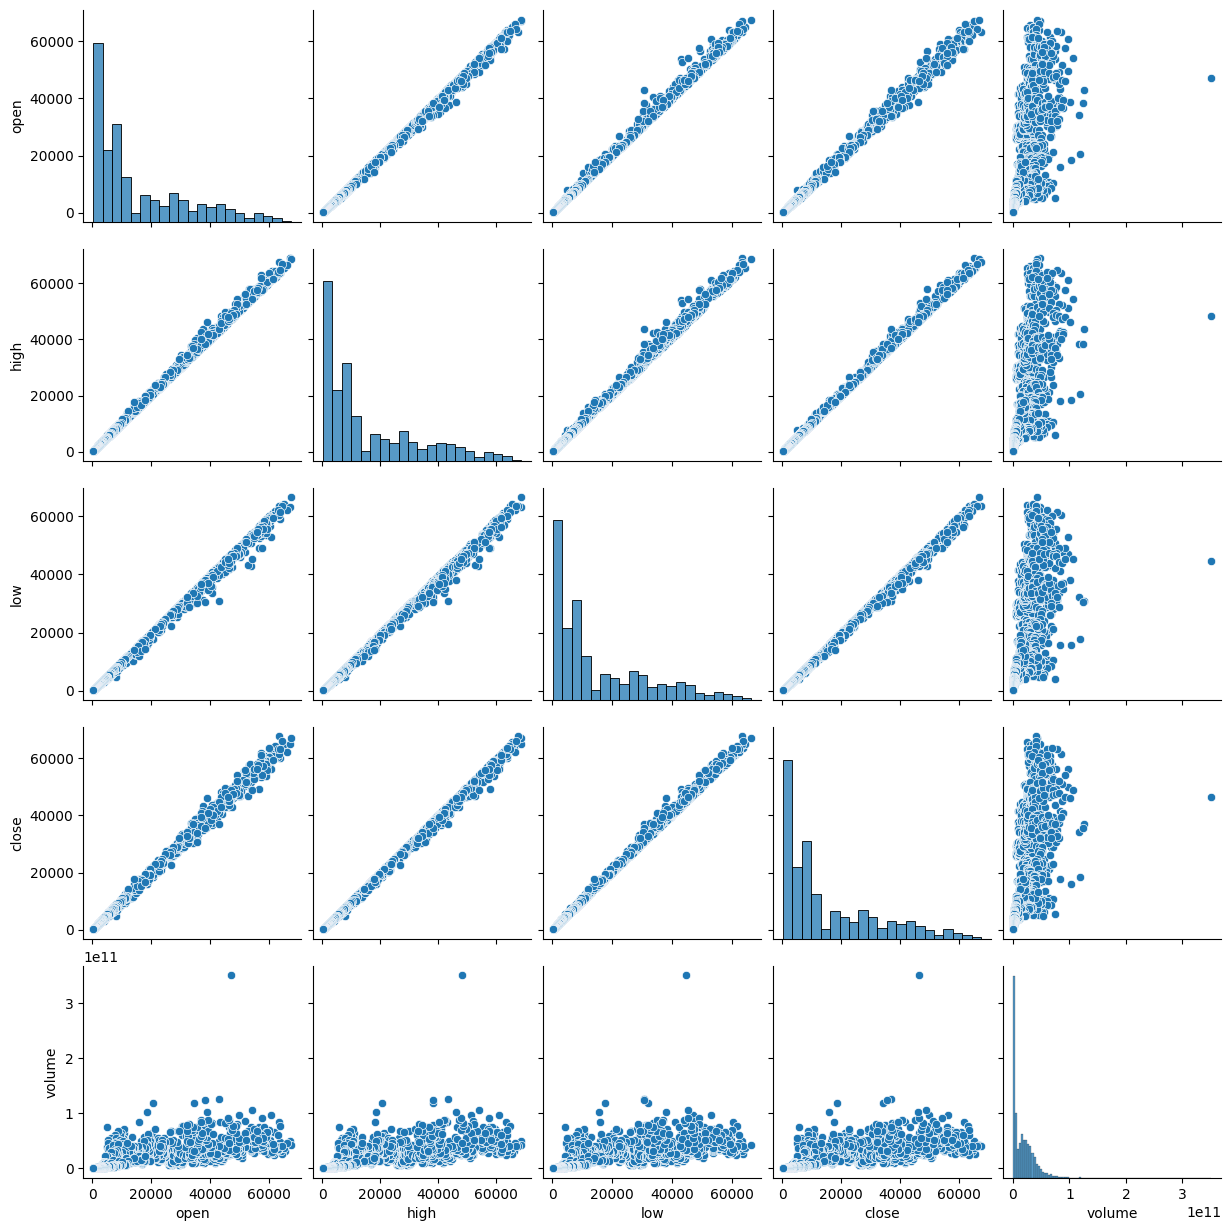

In [51]:
# Pair plots to visualize relationships between numeric variables
sns.pairplot(exchange_data[['open', 'high', 'low', 'close', 'volume']])
plt.show()

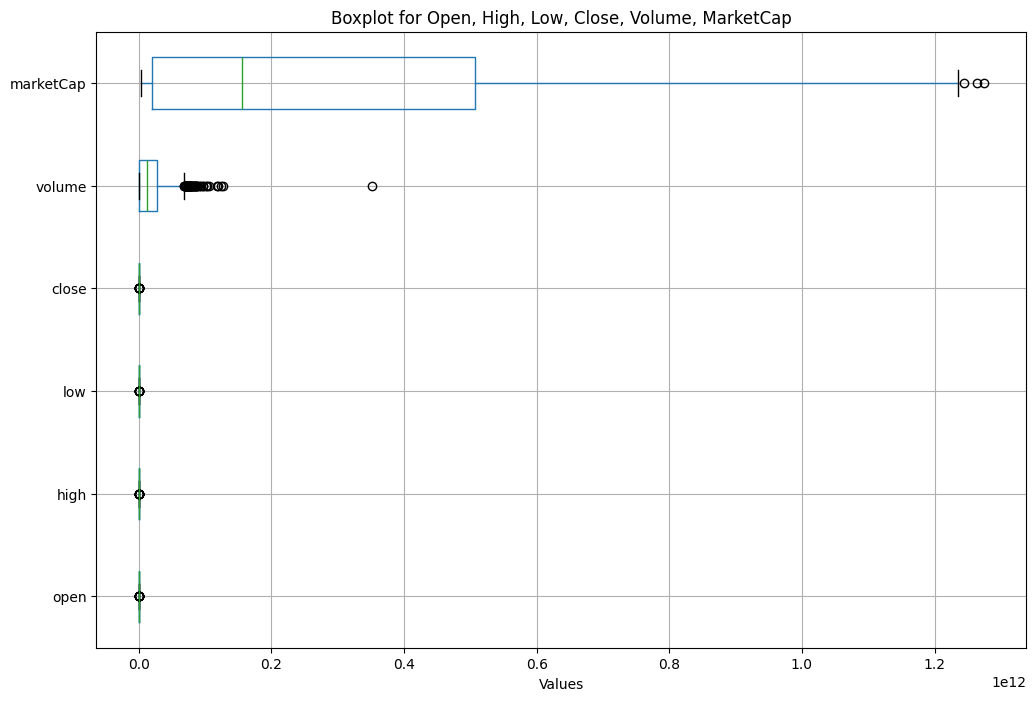

In [52]:
# Boxplots to check for outliers

selected_columns = ['open', 'high', 'low', 'close', 'volume', 'marketCap']

# Creating a boxplot for the selected columns
exchange_data[selected_columns].boxplot(figsize=(12, 8), vert=False)
plt.title('Boxplot for Open, High, Low, Close, Volume, MarketCap')
plt.xlabel('Values')
plt.show()


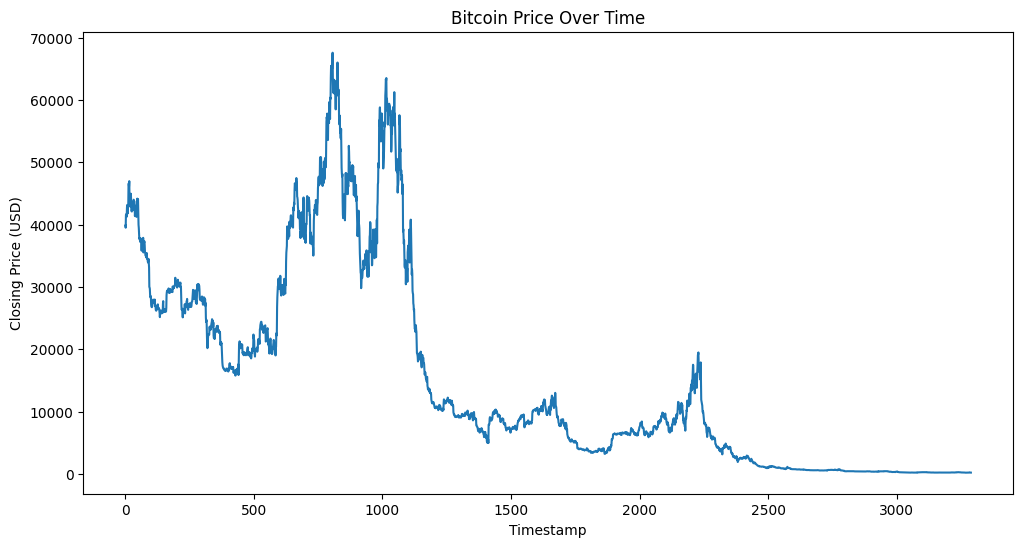

In [53]:
# Plot the closing prices over time
plt.figure(figsize=(12, 6))
exchange_data['close'].plot(title='Bitcoin Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price (USD)')
plt.show()


In [54]:
# Closing prices overtime (a better view, also interactive)

btc_trace_high = go.Scatter(
    x=exchange_data['timestamp'],
    y=exchange_data['high'],
    name="High Price",
    line=dict(color='#17BECF'),
    opacity=0.8
)

btc_trace_low = go.Scatter(
    x=exchange_data['timestamp'],
    y=exchange_data['low'],
    name="Low Price",
    line=dict(color='#7F7F7F'),
    opacity=0.8
)

data = [btc_trace_high, btc_trace_low]

start = '2015-01-21'
end = '2024-01-23'

layout = dict(
    title="Bitcoin Price Timeseries since 2015",
    xaxis=dict(range=[start, end])
)

fig = dict(data=data, layout=layout)

# Use show() from plotly.offline
from plotly.offline import iplot

iplot(fig, filename="Bitcoin price time series from 2015")


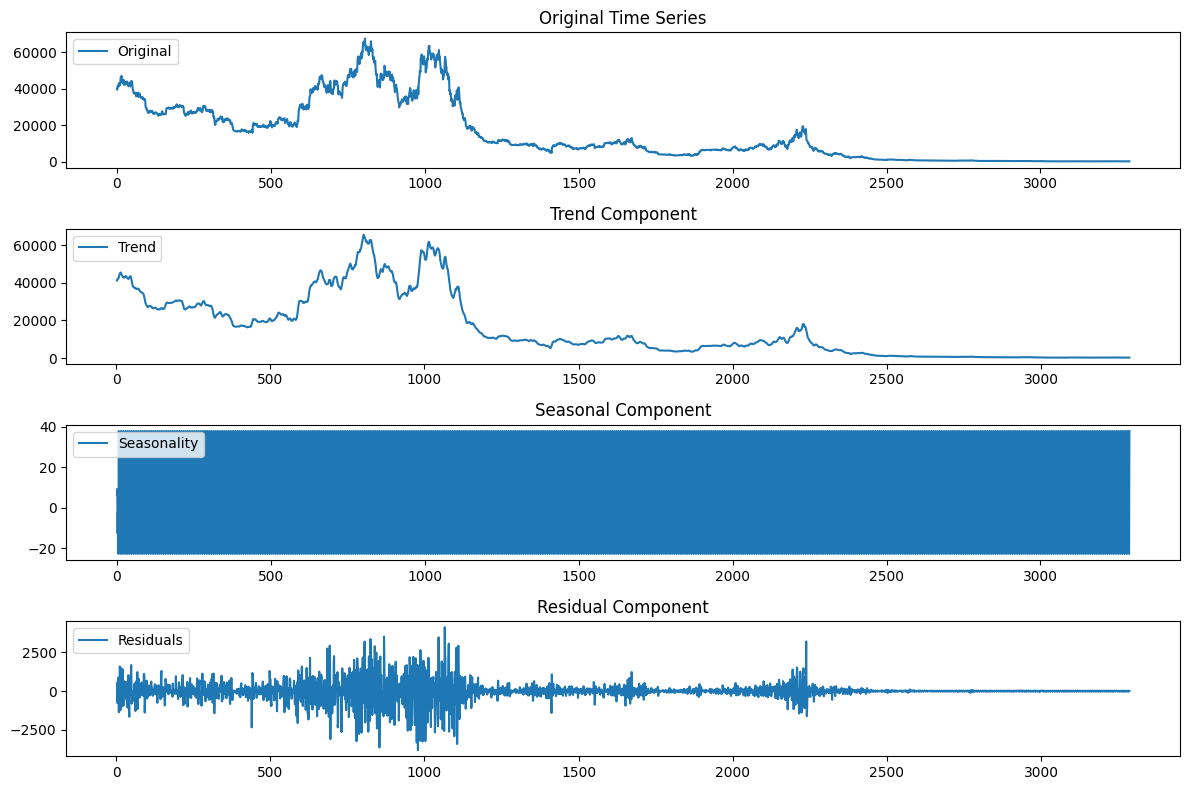

In [55]:
# Perform seasonal decomposition (one week)
result = seasonal_decompose(exchange_data['close'], model='additive', period=7)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(exchange_data['close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


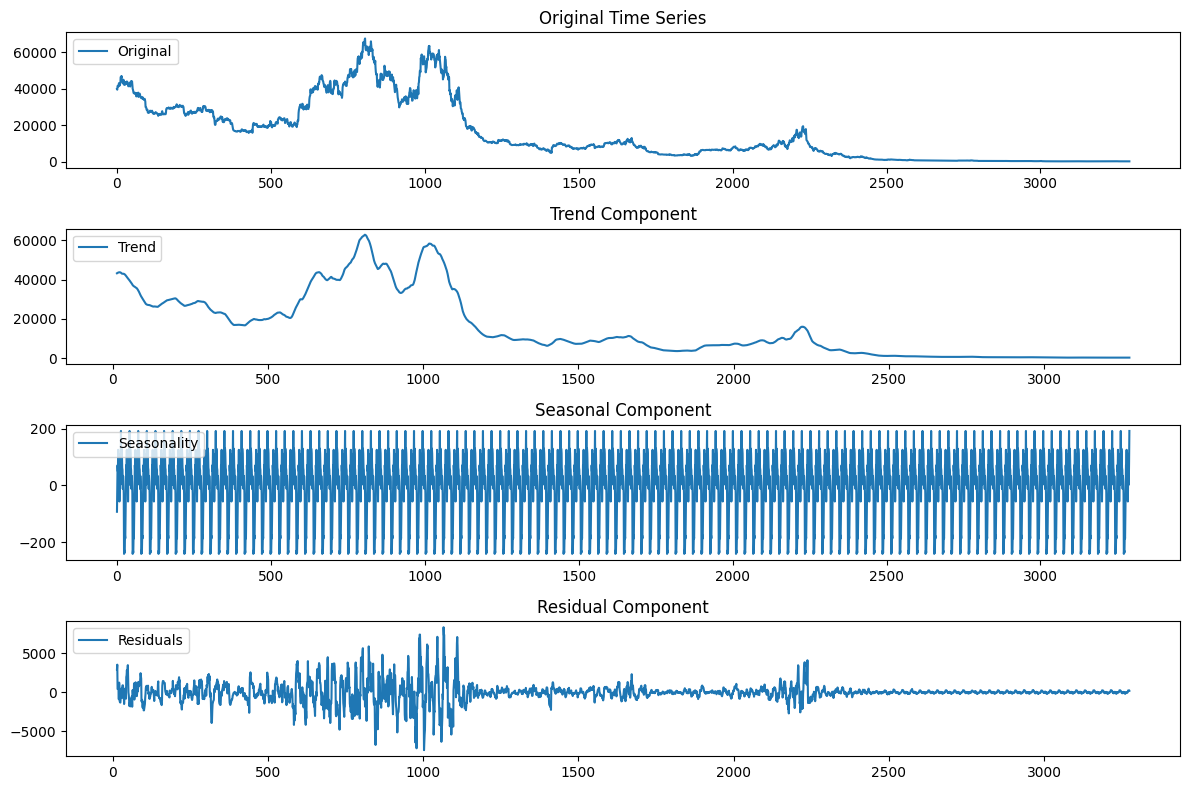

In [56]:
# Perform seasonal decomposition (28 days for a month)
result = seasonal_decompose(exchange_data['close'], model='additive', period=28)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(exchange_data['close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


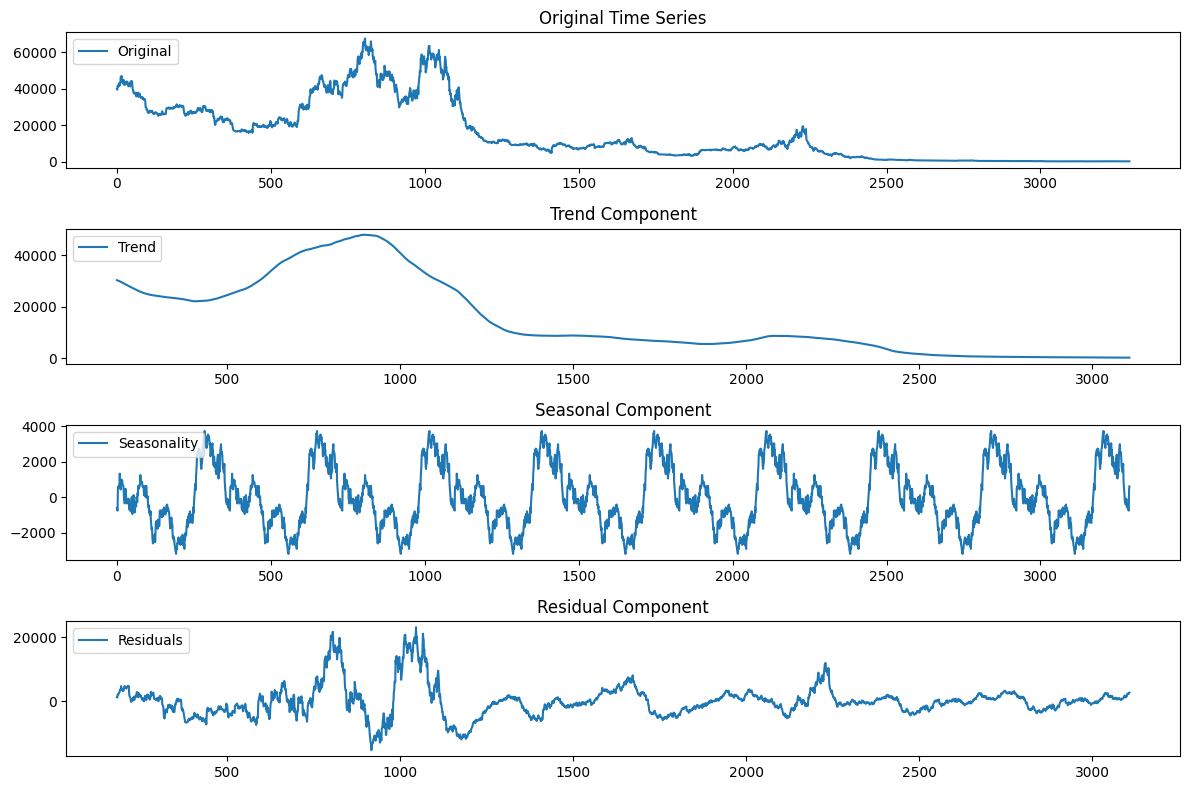

In [57]:
# Perform seasonal decomposition (a year)
result = seasonal_decompose(exchange_data['close'], model='additive', period=365)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(exchange_data['close'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


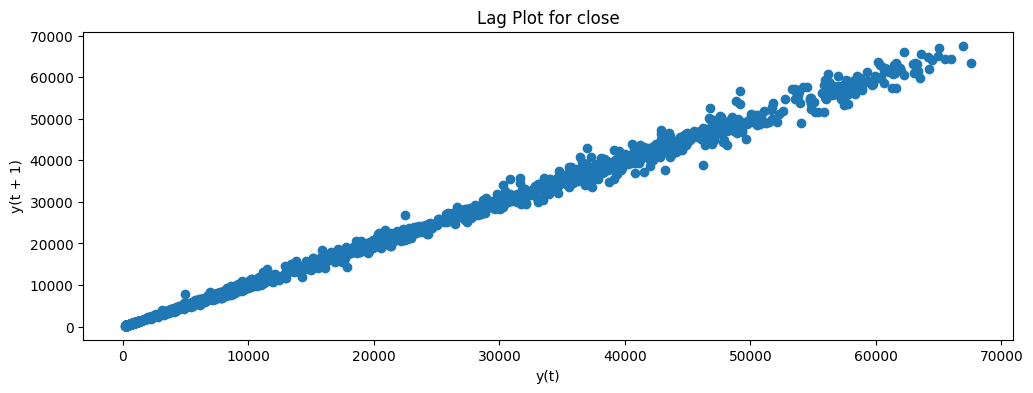

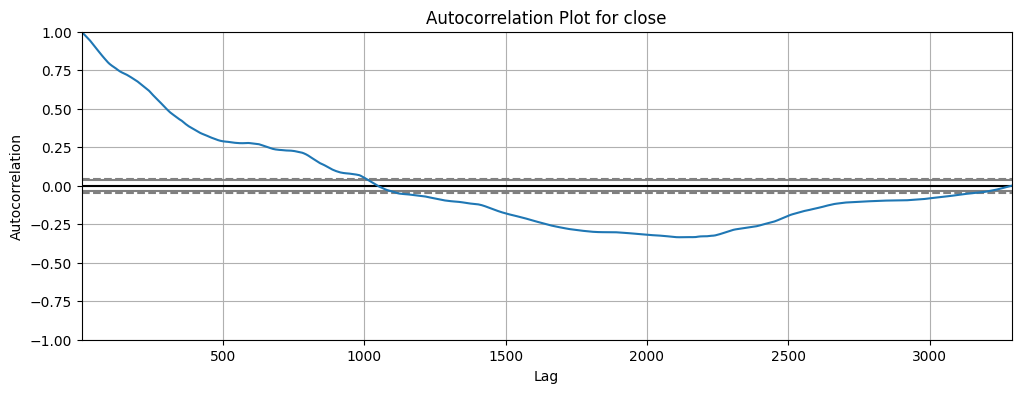

In [58]:
# Lag plot to reveal patterns and dependencies in the time series data.

target = 'close'

# Lag plot for the target variable
plt.figure(figsize=(12, 4))
lag_plot(exchange_data[target])
plt.title(f'Lag Plot for {target}')
plt.show()

# Autocorrelation plot for the target variable
plt.figure(figsize=(12, 4))
autocorrelation_plot(exchange_data[target])
plt.title(f'Autocorrelation Plot for {target}')
plt.show()


In [59]:
# Statistical analysis to compare means between two time periods

split_date = '2020-01-01'
split_date = pd.to_datetime(split_date)

group1 = exchange_data[exchange_data['timestamp'] < split_date]['close']
group2 = exchange_data[exchange_data['timestamp'] >= split_date]['close']

# t-test to compare the means of the two groups
t_statistic, p_value = ttest_ind(group1, group2, nan_policy='omit')  # Omit NaN values

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check if the p-value is below the significance level (0.05) to determine significance
alpha = 0.05
if p_value < alpha:
    print('The means are significantly different.')
else:
    print('There is no significant difference in means.')


T-Statistic: -67.84085793516705
P-Value: 0.0
The means are significantly different.
